
## Problem: 
Find shortest number of steps to a goal node (simple shortest path problem)
from whatever start node selected
selected goal node updates reward matrix from the positions that represent moving directly go to the goal node
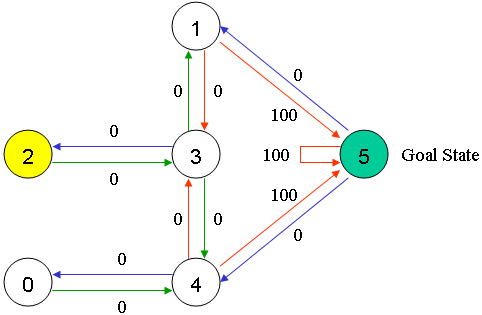
In this image the start node is 2 and goal node is 5 as it can move directly to 5 again (loop)

In [47]:
import numpy as np

In [207]:
def init_reward_matrix(goal_state=5, initial_goal_reward=100):
    
    global R
    # Reward matrix
    # each row is a state, col is a destination node
    # -1 is marked "null" move and can't be taken
    R = np.asmatrix([[-1, -1, -1, -1,  0, -1], # 0 can take action 4
                     [-1, -1, -1,  0, -1,  0], # 1 can take action 3, 5
                     [-1, -1, -1,  0, -1, -1], # 2 can take action 3
                     [-1,  0,  0, -1,  0, -1], # 3 can take action 1, 4
                     [ 0,  -1, -1, 0, -1,  0], # 4 can take action 0, 3, 5
                     [-1,  0, -1, -1,  0,  -1] # 5 can take action 1, 4
                    ])
    
    # add reward for 1-length path moves to goal (e.g. 100)
    for (row_idx, col_idx), reward in np.ndenumerate(R):
        if col_idx == goal_state and reward != -1:
            R[row_idx, col_idx] = initial_goal_reward
        
        # Make action of moving from goal to goal possible/desirable
        if row_idx == goal_state and col_idx == goal_state:
            R[row_idx, col_idx] = initial_goal_reward
    
    print(f"Reward matrix with goal_state {goal_state}: \n {R}\n")

In [175]:
# Return all available actions for a given state
def available_actions(state):
    current_state_row = R[state,]
    actions = np.where(current_state_row != -1)[1]
    return actions

# Updates the Q-values
def update(current_state, action, gamma):
    # get column index of max q-value 
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        #if multiple choose randomly
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]

    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

In [ ]:


Q_history =  []

### Q values
Q = np.asmatrix(np.zeros([6, 6]))

# Gamma (learning parameter).
gamma = 0.8

goal_state = int(input("Please enter the goal state (0-5) to train with: "))
init_reward_matrix(goal_state)


# Train - Iteratively improve Q-values so that they indicate optimal actions
# Keep choosing a random state and a random action and updating Q-table
def train(iterations=1000):
    
    for i in range(10000):
        # random starting state
        current_state = np.random.randint(int(Q.shape[0]))

        # random next action (state to move to)
        available_act = available_actions(current_state)
        action = int(np.random.choice(available_act, 1))
        
        # update Q-values
        update(current_state, action, gamma)
        np.set_printoptions(precision=3)

        Q_history.append({"Q": np.copy(Q), 
                          "state": current_state, 
                          "action": action, 
                          "reward" : R[current_state, action]
                        })
        

train(10000)

# Update Q matrix
#update(initial_state, action, gamma)

np.set_printoptions(precision=3)
print(f"Trained Q values:\n{Q}\n")

# Normalise the "trained" Q matrix
#print(f"Train Q values (normalised):\n{Q / np.max(Q) * 100}\n")


# Testing

# Goal state = 5 (implicit from the Reward matrix)
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = int(input("Please enter starting any starting state (0-5): "))

steps = [current_state]

if current_state not in range(6) or goal_state not in range(6):
    print("Error: Invalid states" )
    sys.exit(-1)

print(R)

num_timesteps = 10

# Start episode
# alternatively: 
# while current_state != goal_state:
while num_timesteps > 0:
    
    # Explanation: np.where(condition) returns (row, column) indices of the found condition
    # we need the maximum Q value -> largest column value in the current states row
    # this is because each entry in each row is the cumulative reward for taking the action (column)
    # from the current state (row)
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

    num_timesteps -= 1
    
# Print selected sequence of steps
print(f"\nSelected path: {steps}")



In [ ]:
from IPython.display import clear_output
from time import sleep

def print_history(dicts):
    for i, frame in enumerate(dicts):
        clear_output(wait=True)
        print(frame['Q'])
        print(f"Iteration: {i + 1}")
        print(f"Random State: {frame['state']}")
        print(f"Random Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
              
'''Demonstrates how the random states with random actions iteratively improves the Q-values, which all 
    eventually converge and don't change'''
print_history(Q_history)

[[500.   0.   0.   0. 400.   0.]
 [  0.   0.   0. 320.   0. 320.]
 [  0.   0.   0. 320.   0.   0.]
 [  0. 256. 256.   0. 400.   0.]
 [500.   0.   0. 320.   0. 320.]
 [  0. 256.   0.   0. 400.   0.]]
Iteration: 6427
Random State: 3
Random Action: 2
Reward: 0


### 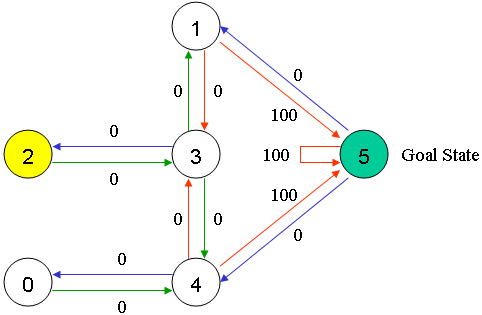
In this image the start node is 2 and goal node is 5 as it can move directly to 5 again (loop)